In [1]:
import numpy as np
from numpy import *

import pandas as pd

# from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"

Load cs-training.csv into a Pandas dataframe.

In [2]:
# Do experiments with many options in the beginning
df = pd.read_csv('cs-training.csv')
df.head()  #df.shape

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Fill-in the missing values (nan) with the column means.

In [3]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
df = df.fillna(df.mean())

In [5]:
df.isnull().sum()
df.shape

(150000, 12)

In [6]:
X = df.iloc[:,2:]
X.head()
X.shape

(150000, 10)

In [7]:
y = df.SeriousDlqin2yrs

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [139974  10026]
Labels count in y_train: [97982  7018]
Labels count in y_test: [41992  3008]


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set') 

Select the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features)

In [13]:
for i in range(2,-5,-1):
    lr = LogisticRegression(C=10**i,
                        random_state=1,
                        penalty='l1',
                        solver='liblinear',
                        multi_class='ovr')
    lr.fit(X_train_std, y_train)
   # c_vec = np.copy(lr.coef_[0])
    count = 0
    for item in lr.coef_[0]:
        if item != 0:
            count += 1
    if count < 3:
        break

print("the optimal C is : 10 **", i)
print("the features number is :", count)
   

the optimal C is : 10 ** -3
the features number is : 2


In [14]:
lr.coef_[0]

array([ 0.        , -0.26957673,  0.10883184,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [15]:
X_train = X_train.iloc[:,[1,2]]
X_test = X_test.iloc[:,[1,2]]

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
lr = LogisticRegression(C=10**-3,
                        random_state=1,
                        solver='lbfgs',
                        multi_class='ovr')
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.001, multi_class='ovr', random_state=1)

Using the 2 selected features, apply LR / SVM / decision tree. Try your own hyperparameters (C, gamma, tree depth, etc) to maximize the prediction accuracy. (Just try several values. You don't need to show your answer is the maximum.)
Visualize your classifiers using the plot_decision_regions function from PML Ch. 3

C:\Users\ZcarryV\AppData\Local\Temp\ipykernel_22264\3366577703.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


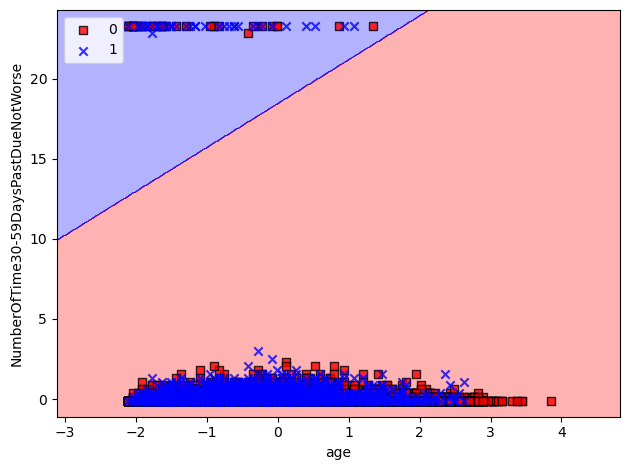

In [18]:
plot_decision_regions(X_test_std,
                      y_test,
                      classifier=lr,
                      test_idx=None)
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# SVM

SVC(gamma=0.1, kernel='poly', random_state=1)

C:\Users\ZcarryV\AppData\Local\Temp\ipykernel_12596\3366577703.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


Text(0.5, 0, 'petal length [standardized]')

Text(0, 0.5, 'petal width [standardized]')

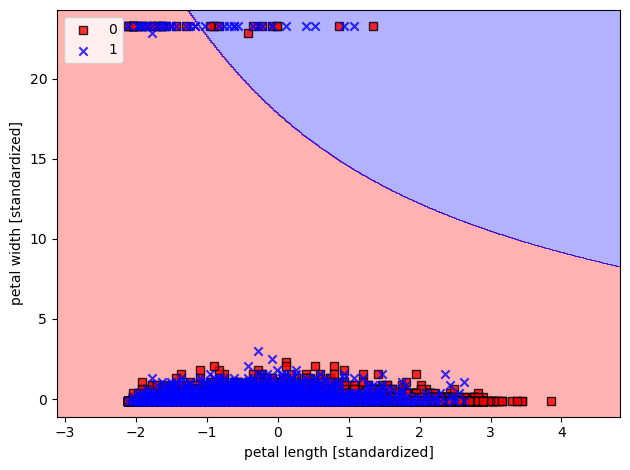

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', random_state=1, gamma=0.1, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_test_std, y_test,
                      classifier=svm, test_idx=None)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

DecisionTreeClassifier(max_depth=4, random_state=1)

d:\Users\ZcarryV\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ZcarryV\AppData\Local\Temp\ipykernel_12596\3366577703.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


Text(0.5, 0, 'age')

Text(0, 0.5, 'feature2')

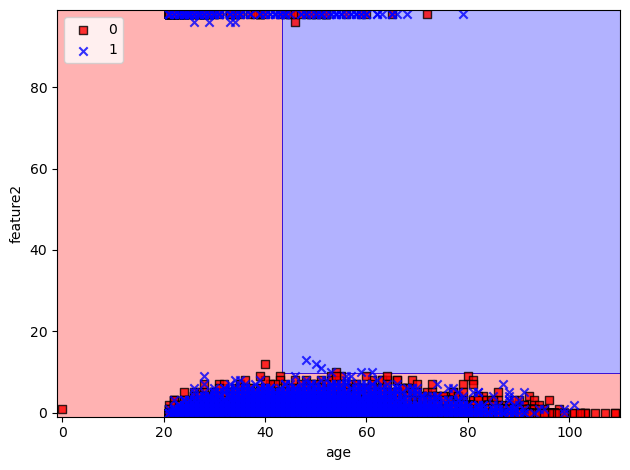

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=None)

plt.xlabel('age')
plt.ylabel('feature2')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [ ]:
df = pd.read_csv('cs-test.csv')
df.head()  #df.shape

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [ ]:
pre = df.iloc[:,3:5]
prob = lr.predict_proba(pre)

d:\Users\ZcarryV\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
output = pd.DataFrame({'Id': df.index,'Probability': prob[:,1]})
output.to_csv('submission.csv', index=False)